
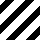
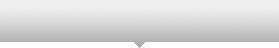
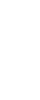
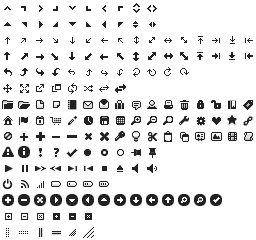
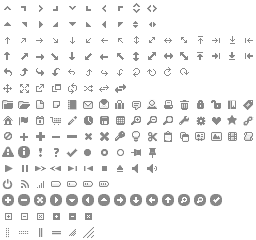
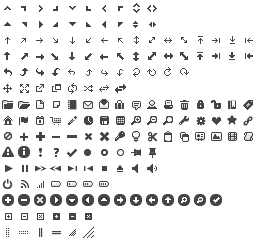
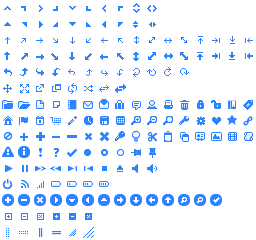
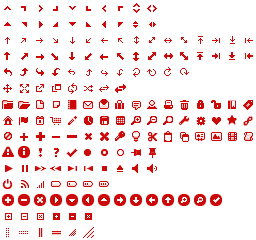
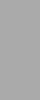
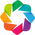
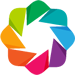
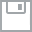
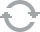
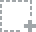
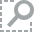
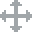
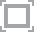
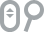

In [1]:
import yaml
import numpy as np

from scipy.interpolate import SmoothBivariateSpline

import bokeh.plotting as bkh
from bokeh.models import HoverTool

In [2]:
import matplotlib.pyplot as plt
from matplotlib import pylab
%matplotlib inline

import descartes as des

In [3]:
import sys
sys.path.append("../")

from electronfactors.model.threshold import angle_gap, fit_give
from electronfactors.ellipse.equivalent import EquivalentEllipse

In [4]:
bkh.output_notebook()

In [5]:
with open("output/AllInputs_guessed.yml", 'r') as inputFile:
    AllInputs_guessed = yaml.load(inputFile)

In [6]:
# Should have it at this stage so that it searches for all valid 
# energy / applicator / ssd combos and runs this function for each
# valid combo

energy = 12
applicator = 10
ssd = 100

output_filename = (
    "output/model_cache_" + 
    str(energy) + "MeV_" + 
    str(applicator) + "app_" + 
    str(ssd) + "ssd.yml"
)

relevantcoords = dict()

for i, key in enumerate(AllInputs_guessed):
    sameenergy = AllInputs_guessed[key]['energy'] == energy
    sameapplicator = AllInputs_guessed[key]['applicator'] == applicator
    samessd = AllInputs_guessed[key]['ssd'] == ssd
    
    if sameenergy and sameapplicator and samessd:
        relevantcoords[key] = AllInputs_guessed[key]

In [7]:
width = np.zeros(len(relevantcoords))
length = np.zeros(len(relevantcoords))
factor = np.zeros(len(relevantcoords))
label = [0] * len(relevantcoords)
poi = [0] * len(relevantcoords)

for i, key in enumerate(relevantcoords):
    width[i] = relevantcoords[key]['width']
    length[i] = relevantcoords[key]['length']
    factor[i] = relevantcoords[key]['factor']
    label[i] = key
    poi[i] = relevantcoords[key]['poi']

In [8]:
ratio = width/length
eqPonA = 2*( 3*(ratio+1) - np.sqrt( (3*ratio+1)*(ratio+3) ) ) / width

In [9]:
bivariateSpline = SmoothBivariateSpline(width,eqPonA,factor,kx=2,ky=2)

In [10]:
min_distance = 1.5

def circle_fit(radii):
    
    if radii >= min_distance:
        result = bivariateSpline.ev(radii*2, 2/radii)
        
    else:
        result = 0.
               
    return result

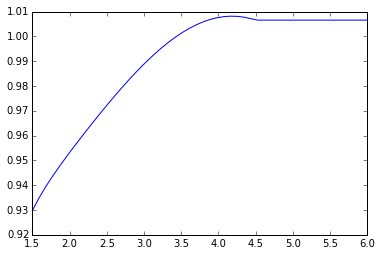

In [11]:
radii = np.linspace(1.5, 6)
y = np.array([circle_fit(radius) for radius in radii])
plt.plot(radii, y)

In [12]:
# radii = np.linspace(0,5)
# y = circle_fit(radii)

# plt.plot(radii, y)

In [13]:
# radii = np.linspace(np.min(width),5)
# y = circle_fit(radii)

# plt.plot(radii, y)

In [14]:
updatedGuess = dict()

In [15]:
def plot_equivalent_ellipse(eqEllipseObject):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    patch = des.PolygonPatch(eqEllipseObject.centredCutout, fc=np.random.uniform(size=3), alpha=0.3)
    ax.add_patch(patch)

    patch = des.PolygonPatch(eqEllipseObject.straightenedCutout, fc=np.random.uniform(size=3), alpha=0.3)
    ax.add_patch(patch)

    patch = des.PolygonPatch(eqEllipseObject.eqEllipse, fc=np.random.uniform(size=3), alpha=0.5)
    ax.add_patch(patch)

    plt.scatter(0,0)
    ax.axis("equal")
    
    plt.title(str(key))
    plt.show()

It would be worth rotating the ellipses to the cutout for visual reasons

In [16]:
equivalentEllipse = dict()

Simon #43 cutout:
    Width: 6.1
    Length: 7.7



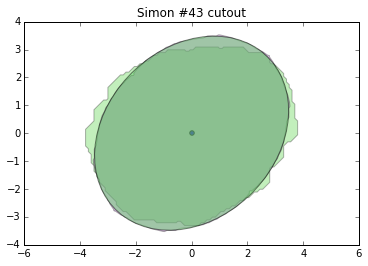

Simon #16 cutout:
    Width: 6.0
    Length: 10.5



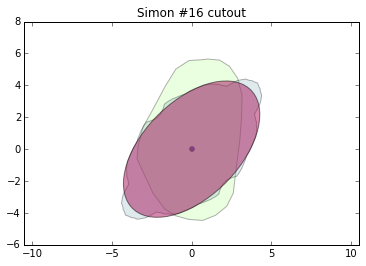

Simon 6cm circle:
    Width: 6.0
    Length: 6.0



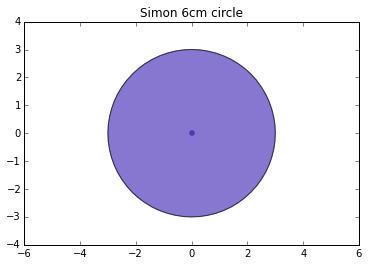

Simon 9cm circle:
    Width: 9.0
    Length: 9.0



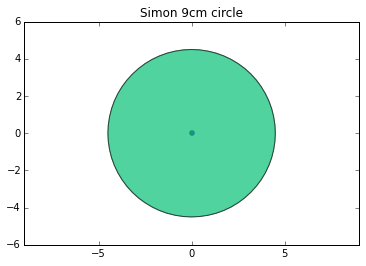

Simon 5x13cm oval:
    Width: 5.0
    Length: 13.0



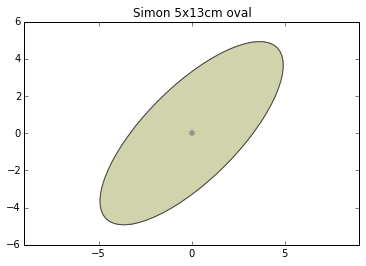

Simon #73 cutout:
    Width: 7.3
    Length: 9.1



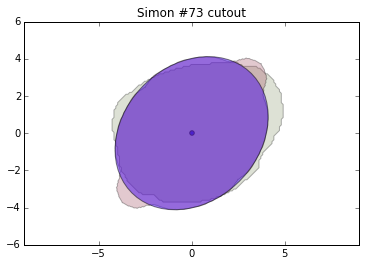

Simon #112 cutout:
    Width: 3.5
    Length: 4.1



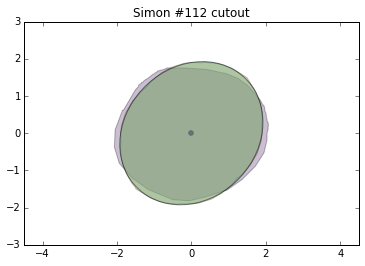

Simon #18 cutout:
    Width: 7.6
    Length: 10.0



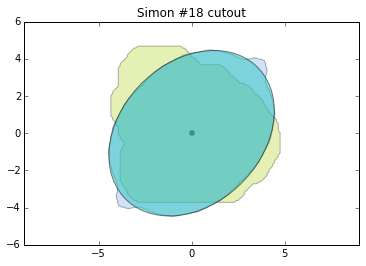

Simon #109 cutout:
    Width: 6.3
    Length: 7.8



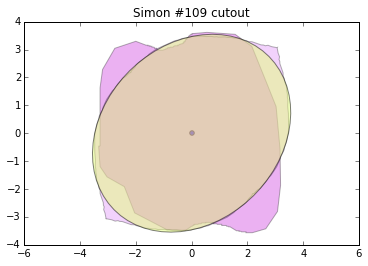

Simon #19 cutout:
    Width: 5.7
    Length: 10.5



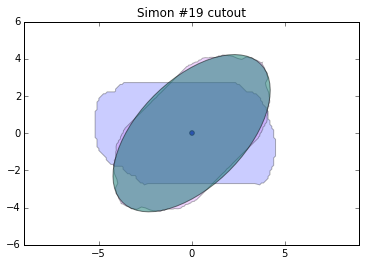

Simon 3x5cm oval:
    Width: 3.0
    Length: 5.0



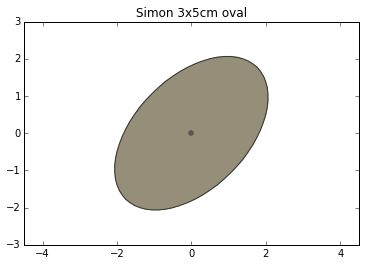

Simon #6 cutout:
    Width: 7.0
    Length: 10.7



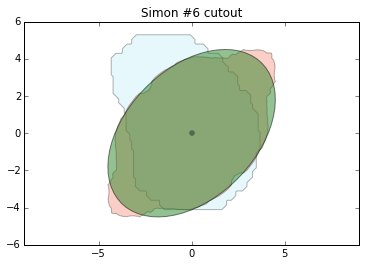

Simon 8cm circle:
    Width: 8.0
    Length: 8.0



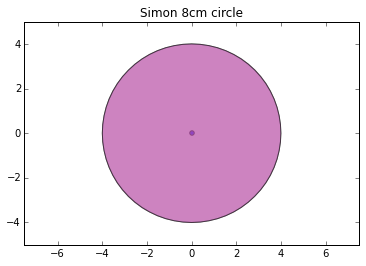

Simon #22 cutout:
    Width: 5.1
    Length: 10.3



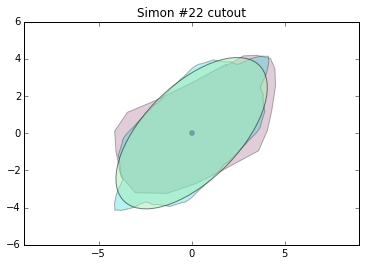

Simon #3 cutout:
    Width: 4.5
    Length: 6.1



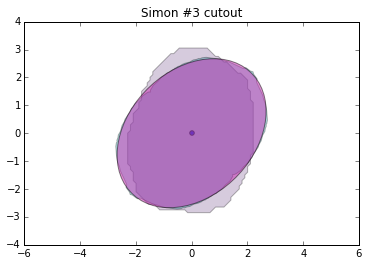

Simon #106 cutout:
    Width: 6.1
    Length: 9.7



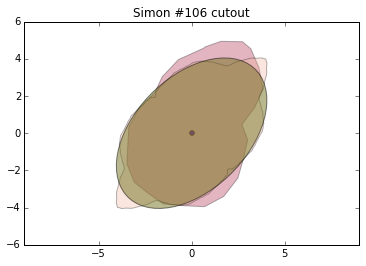

Simon 4x6.5cm oval:
    Width: 4.0
    Length: 6.5



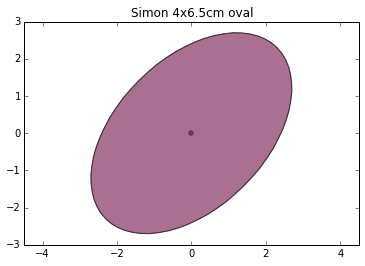

Simon 5cm circle:
    Width: 5.0
    Length: 5.0



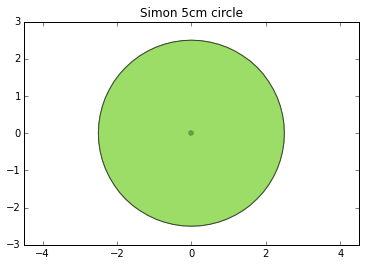

Simon #34 cutout:
    Width: 6.9
    Length: 9.9



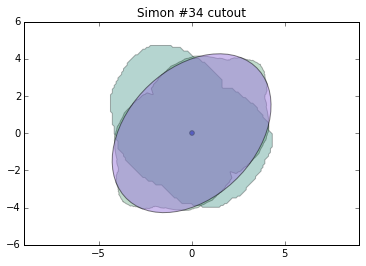

Simon #82 cutout:
    Width: 6.3
    Length: 7.9



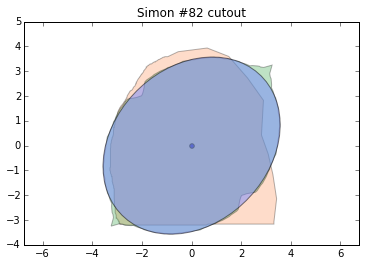

Simon #83 cutout:
    Width: 5.8
    Length: 7.9



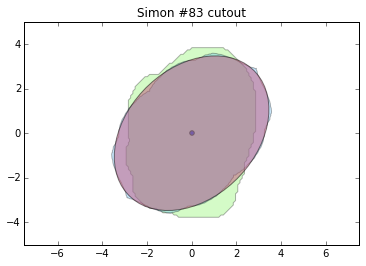

Simon 4x8cm oval:
    Width: 4.0
    Length: 8.0



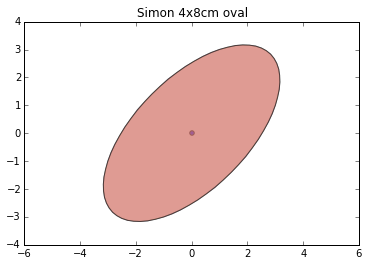

Simon 4x10cm oval:
    Width: 4.0
    Length: 10.0



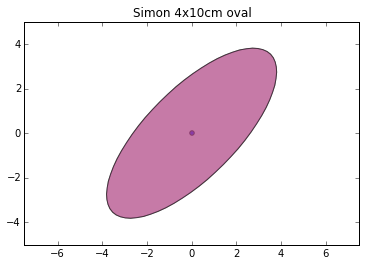

Simon 4x13cm oval:
    Width: 4.0
    Length: 13.0



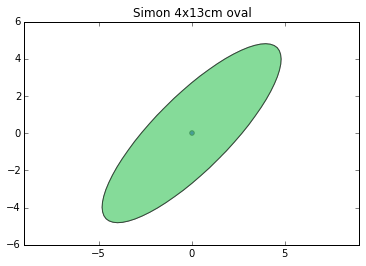

Simon #104 cutout:
    Width: 5.6
    Length: 8.3



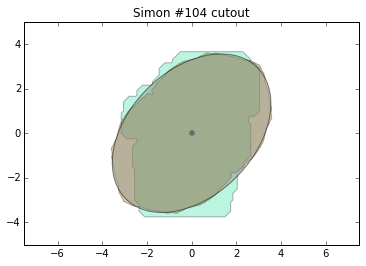

Simon #58 cutout:
    Width: 5.9
    Length: 7.5



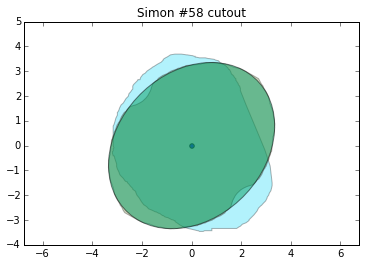

Simon 3x9cm oval:
    Width: 3.0
    Length: 9.0



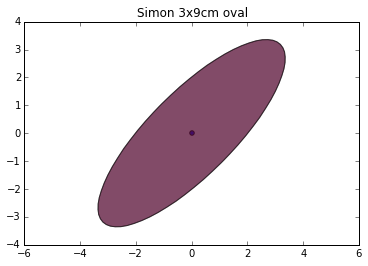

Simon 3cm circle:
    Width: 3.0
    Length: 3.0



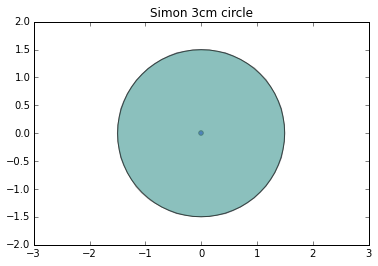

Simon 5x10cm oval:
    Width: 5.0
    Length: 10.0



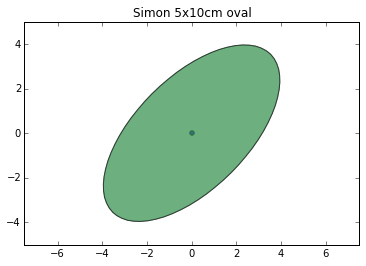

Simon 3x13cm oval:
    Width: 3.0
    Length: 13.0



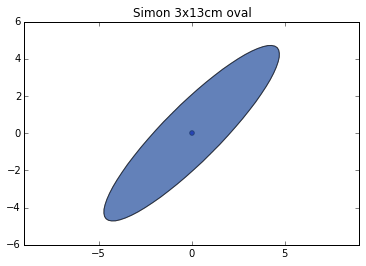

Simon #20 cutout:
    Width: 4.3
    Length: 5.1



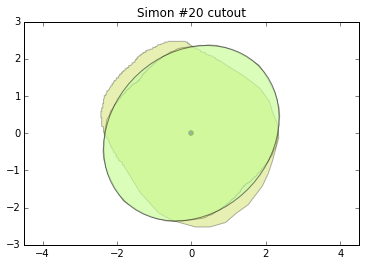

Simon #32 cutout:
    Width: 7.7
    Length: 11.3



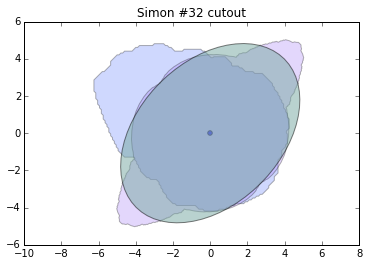

Simon 3x6.5cm oval:
    Width: 3.0
    Length: 6.5



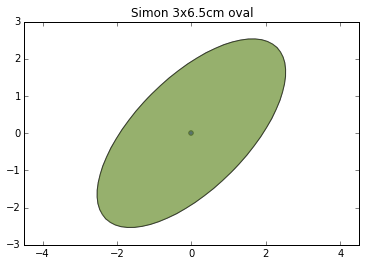

Simon 5x8cm oval:
    Width: 5.0
    Length: 8.0



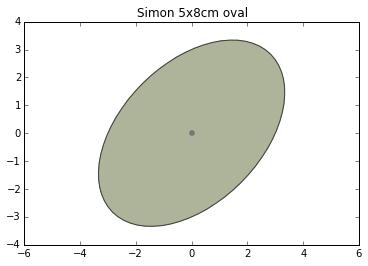

Simon #57 cutout:
    Width: 3.6
    Length: 4.6



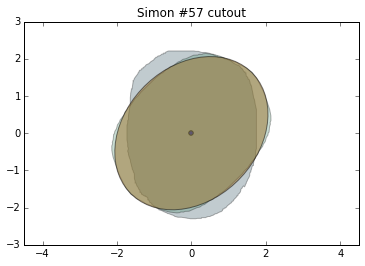

Simon #41 cutout:
    Width: 6.9
    Length: 10.0



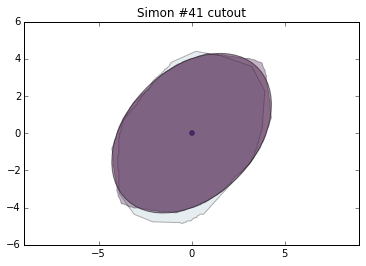

Simon 7cm circle:
    Width: 7.0
    Length: 7.0



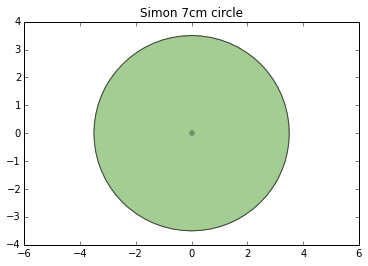

Simon #70 cutout:
    Width: 7.4
    Length: 8.4



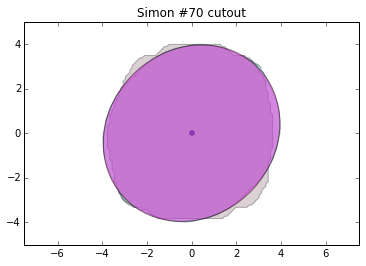

Simon #38 cutout:
    Width: 4.6
    Length: 5.7



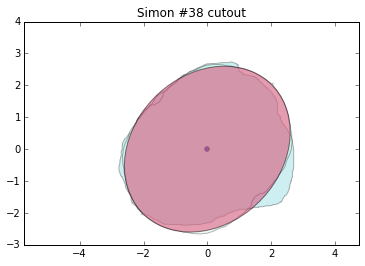

Simon #14 cutout:
    Width: 4.4
    Length: 5.3



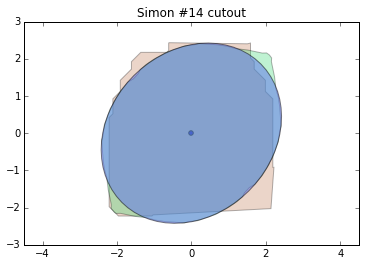

Simon 4cm circle:
    Width: 4.0
    Length: 4.0



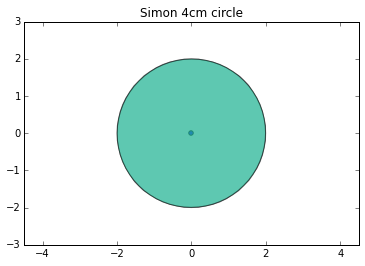

Simon #33 cutout:
    Width: 5.9
    Length: 6.2



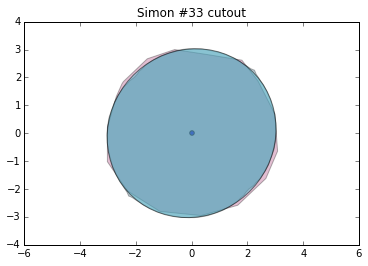

In [17]:


for i, key in enumerate(label):
    XCoords = relevantcoords[key]['XCoords']
    YCoords = relevantcoords[key]['YCoords']
    
    equivalentEllipse[key] = EquivalentEllipse(
        x=XCoords, y=YCoords, 
        circle_fit=circle_fit, n=5, 
        min_distance=1.49,
        poi=poi[i]
    )
    
    
    updatedGuess[key] = dict()
    width = equivalentEllipse[key].width
    length = equivalentEllipse[key].length
    
    updatedGuess[key]['width'] = width
    updatedGuess[key]['length'] = length
    
    print("Progress: %0.1f%%\n" % (100*(i+1) / len(label),))
    print(str(key) + ":\n    Width: %0.2f\n    Length: %0.2f\n" % (width, length))
    
    plot_equivalent_ellipse(equivalentEllipse[key])
    
    

In [18]:
for key in label:
    
    updatedGuess[key]['XCoords'] = relevantcoords[key]['XCoords']
    updatedGuess[key]['YCoords'] = relevantcoords[key]['YCoords']
    updatedGuess[key]['factor'] = relevantcoords[key]['factor']
    updatedGuess[key]['energy'] = relevantcoords[key]['energy']
    updatedGuess[key]['applicator'] = relevantcoords[key]['applicator']
    updatedGuess[key]['ssd'] = relevantcoords[key]['ssd']
    updatedGuess[key]['poi'] = relevantcoords[key]['poi']
    
    updatedGuess[key]['width'] = round(float(updatedGuess[key]['width']), 2)
    updatedGuess[key]['length'] = round(float(updatedGuess[key]['length']), 2)

In [19]:
with open(output_filename, 'w') as outfile:
    outfile.write(yaml.dump(updatedGuess, default_flow_style=False))

In [20]:
# # This is as a result of the "dip" in the circle_fit. It results in a point of maximum dose
# # that claims to be off centre. It is likely not the case, but worth doing a profile to see
# # if this is actually not nonsense. 

# key = 'Simon 9cm circle'

# XCoords = relevantcoords[key]['XCoords']
# YCoords = relevantcoords[key]['YCoords']

# equivalentEllipse[key] = EquivalentEllipse(
#     x=XCoords, y=YCoords, 
#     circle_fit=circle_fit, n=2, 
#     min_distance=1.49,
#     poi=poi[i]
# )


# updatedGuess[key] = dict()
# width = equivalentEllipse[key].width
# length = equivalentEllipse[key].length

# updatedGuess[key]['width'] = width
# updatedGuess[key]['length'] = length

# print(str(key) + ":\n    Width: %0.1f\n    Length: %0.1f\n" % (width, length))

# plot_equivalent_ellipse(equivalentEllipse[key])



In [21]:
# def print_equivalent_ellipse(eqEllipseObject, scale):
#     store = pylab.rcParams['savefig.dpi']
#     pylab.rcParams['savefig.dpi'] = 254
    
#     w = scale; l = scale
#     fig = plt.figure(figsize=(w/2.54, l/2.54))
#     fig.subplots_adjust(left=0, right=1, top=1, bottom=0)
#     ax = fig.add_subplot(111)

#     patch = des.PolygonPatch(eqEllipseObject.centredCutout, fc=np.random.uniform(size=3), alpha=0.4)
#     ax.add_patch(patch)

#     patch = des.PolygonPatch(eqEllipseObject.straightenedCutout, fc=np.random.uniform(size=3), alpha=0.3)
#     ax.add_patch(patch)

#     patch = des.PolygonPatch(eqEllipseObject.eqEllipse, fc=np.random.uniform(size=3), alpha=0.7)
#     ax.add_patch(patch)

#     plt.scatter(0,0)

#     plt.xlim([-w/2,w/2])
#     plt.ylim([-l/2,l/2])
#     ax.axis("equal")

#     plt.grid(True)


#     plt.savefig('temp.png')

#     !convert -units PixelsPerInch temp.png -density 254 temp.pdf
    
#     pylab.rcParams['savefig.dpi'] = store

In [22]:
# print_equivalent_ellipse(equivalentEllipse[key], 6)

In [23]:
# key

In [24]:
# for i, key in enumerate(label):
    
    
#     fig = plt.figure()
#     ax = fig.add_subplot(111)

#     patch = des.PolygonPatch(equivalentEllipse[key].centredCutout, fc=np.random.uniform(size=3), alpha=0.3)
#     ax.add_patch(patch)

#     patch = des.PolygonPatch(equivalentEllipse[key].straightenedCutout, fc=np.random.uniform(size=3), alpha=0.3)
#     ax.add_patch(patch)

#     patch = des.PolygonPatch(equivalentEllipse[key].eqEllipse, fc=np.random.uniform(size=3), alpha=0.5)
#     ax.add_patch(patch)

#     plt.scatter(0,0)

# #     ax.set_xlim([-equivalentEllipse[key]._Straightened.maxRadii, equivalentEllipse[key]._Straightened.maxRadii])
# #     ax.set_ylim([-equivalentEllipse[key]._Straightened.maxRadii, equivalentEllipse[key]._Straightened.maxRadii])
#     ax.axis("equal")
    
#     plt.title(str(key))
#     plt.show()

In [25]:
# test = equivalentEllipse[key]

In [26]:
# test.eqEllipse

In [27]:
# test.straightenedCutout

In [28]:
width_diff = np.zeros(len(updatedGuess))
length_diff = width_diff.copy()

for i, key in enumerate(label):
    
    width_diff[i] = updatedGuess[key]['width'] - relevantcoords[key]['width']
    length_diff[i] = updatedGuess[key]['length'] - relevantcoords[key]['length']

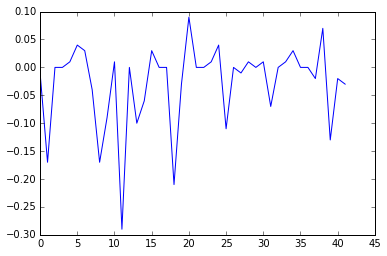

In [29]:

plt.plot(width_diff)

In [30]:
ref = np.argmax(np.abs(width_diff))
label[ref]

'Simon #6 cutout'

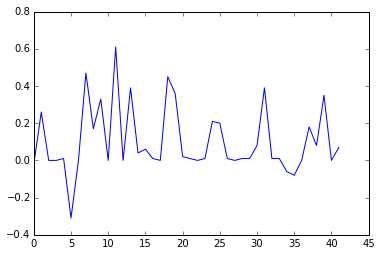

In [31]:
plt.plot(length_diff)

In [32]:
# updatedGuess[key]['width']

In [33]:
# relevantcoords[key]['width']

In [34]:
# updatedGuess[key]['width']

In [35]:
# width

In [36]:
# fig = bkh.figure(title="Factor with width", 
#              tools="resize, box_zoom, reset, hover",
#              plot_height=400, plot_width=900)

# source = bkh.ColumnDataSource(
#     data=dict(
#         label=label,
#         width=width,
#         length=length,
#         factor=factor
#     )
# )

# # fig.line(width, factor, color="blue", line_width=3, alpha=0.3)
# fig.circle(width, factor, color="blue", size=12, alpha=0.5, source=source)

# xa, ya = fig.axis
# xa.axis_label = 'Width (cm)'
# ya.axis_label = 'Factor'

# hover = fig.select(dict(type=HoverTool))
# hover.tooltips = [
#     ("Label", "@label"),
#     ("Width", "@width"),
#     ("Length", "@length"),
#     ("Factor", "@factor"),
#     (" ", " ")
# ]

# bkh.show(fig)

In [37]:
# bivariateSpline = SmoothBivariateSpline(width,eqPonA,factor,kx=2,ky=2)

In [38]:
# minimum_dimension = np.floor(np.min(width)*10)/10
# maximum_dimension = np.ceil(np.max(length)*10)/10 + 0.1

# x_vec = np.arange(minimum_dimension, maximum_dimension, 0.1)
# y_vec = x_vec.copy()

# xx_mesh, yy_mesh = np.meshgrid(x_vec, y_vec)

# mesh_width = xx_mesh.copy()
# mesh_width[xx_mesh > yy_mesh] = yy_mesh[xx_mesh > yy_mesh]

# mesh_length = xx_mesh.copy()
# mesh_length[yy_mesh > xx_mesh] = yy_mesh[yy_mesh > xx_mesh]

# mesh_ratio = mesh_width / mesh_length

# mesh_eqPonA = 2*( 3*(mesh_ratio+1) - np.sqrt( (3*mesh_ratio+1)*(mesh_ratio+3) ) ) / mesh_width

# mesh_factor = bivariateSpline.ev(mesh_width, mesh_eqPonA)
# give = fit_give(mesh_width, mesh_eqPonA, width, eqPonA, factor, kx=2, ky=2)
# gap = angle_gap(mesh_width, mesh_eqPonA, width, eqPonA, 1, 1)

# outOfTolerance = (give > 0.5) | (gap > 180)

# mesh_factor[outOfTolerance] = np.nan
    
# mesh_factor = np.floor(mesh_factor*1e4)/1e4

In [39]:
# x_list = []
# y_list = []
# factor_list = []
# width_list = []
# length_list = []
# eqPonA_list = []

# for i, x in enumerate(x_vec):
#     for j, y in enumerate(y_vec):        
#         if not np.isnan(mesh_factor[i,j]):
#             x_list.append(x)
#             y_list.append(y)
#             width_list.append(mesh_width[i,j])
#             length_list.append(mesh_length[i,j])
#             eqPonA_list.append(mesh_eqPonA[i,j])
#             factor_list.append(round(mesh_factor[i,j],4))

# sourceHeatmap = bkh.ColumnDataSource(
#     data=dict(x=x_list, y=y_list, color=factor_list, 
#               factor=factor_list, width=width_list, 
#               length=length_list, eqPonA=eqPonA_list)
# )

# sourcePlotsNorm = bkh.ColumnDataSource(
#     data=dict(width=width, length=length, factor=factor, eqPonA=eqPonA)
# )

# sourcePlotsMirr = bkh.ColumnDataSource(
#     data=dict(width=width, length=length, factor=factor, eqPonA=eqPonA)
# )

In [40]:
# # Still need colour map

# p = bkh.figure(tools="hover", plot_width=800, plot_height=800)

# p.rect('x', 'y', 0.1, 0.1, source=sourceHeatmap, line_color=None, alpha=0.5)
# p.circle("width", "length", color="green", size=12, alpha=0.5, source=sourcePlotsNorm)
# p.circle("length", "width", color="orange", size=12, alpha=0.5, source=sourcePlotsMirr)

# hover = p.select(dict(type=HoverTool))
# hover.tooltips = [
#     ('Width', '@width'),
#     ('Length', '@length'),
#     ('eqPonA', '@eqPonA'),
#     ('Factor', '@factor')    
# ]

# bkh.show(p)